# MLP服饰识别

In [11]:
#数据加载
from keras.datasets import fashion_mnist
import numpy as np
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()
print(type(X_train),X_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


Text(0.5, 1.0, 'raw img 1')

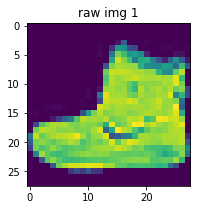

In [12]:
#样本可视化
img1 = X_train[0]
#引入画图包
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(3,3))
plt.imshow(img1)
plt.title('raw img 1')

In [13]:
#输入数据的预处理
feature_size = img1.shape[0]*img1.shape[1]
print(feature_size)
X_train_format = X_train.reshape(X_train.shape[0],feature_size)
X_test_format = X_test.reshape(X_test.shape[0],feature_size)
print(X_train_format.shape,X_train.shape)

784
(60000, 784) (60000, 28, 28)


In [14]:
#数据的归一化处理
X_train_normal = X_train_format/255
X_test_normal = X_test_format/255
print(X_train_normal[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.         0.         0.05098039 0.28627451 

In [15]:
print(X_train_format[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0
   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0
  36 136 127  62  54   0   0   0   1   3   4   0   0   3   0   0   0   0
   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0
   0   0   0  12  10   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15   0   0
   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163
 127 121 122 146 141  88 172  66   0   0   0   0   0   0   0   0   0   1
   1   1   0 200 232 232 233 229 223 223 215 213 16

In [16]:
#输出结果的数据预处理
from keras.utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)
print(y_train[0])
print(y_train_format[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [17]:
print(y_train.shape,y_train_format.shape)

(60000,) (60000, 10)


In [18]:
#建立mlp模型
from keras.models import Sequential
from keras.layers import Dense, Activation

mlp = Sequential()
mlp.add(Dense(units = 392, input_dim = 784, activation='relu'))
mlp.add(Dense(units = 196, activation='relu'))
mlp.add(Dense(units=10, activation='softmax'))
mlp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_5 (Dense)              (None, 196)               77028     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1970      
Total params: 386,718
Trainable params: 386,718
Non-trainable params: 0
_________________________________________________________________


In [19]:
#参数配置
mlp.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [20]:
#模型训练
mlp.fit(X_train_normal, y_train_format, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.4697 - categorical_accuracy: 0.8284
Epoch 2/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.3583 - categorical_accuracy: 0.8672
Epoch 3/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.3205 - categorical_accuracy: 0.8813
Epoch 4/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.2952 - categorical_accuracy: 0.8897
Epoch 5/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.2759 - categorical_accuracy: 0.8962
Epoch 6/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.2637 - categorical_accuracy: 0.9008
Epoch 7/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.2510 - categorical_accuracy: 0.9054
Epoch 8/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.2401 - categorical_accuracy: 0.9077
Epoch 9/10
60000/60000 [==============================] 

In [21]:
#结果预测
y_train_predict = mlp.predict_classes(X_train_normal)
print(y_train_predict[0:10])
print(type(y_train_predict))

[9 0 0 3 3 2 7 4 5 5]
<class 'numpy.ndarray'>


In [22]:
#表现评估
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

0.9245


In [23]:
y_test_predict = mlp.predict_classes(X_test_normal)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

0.8881


In [32]:
#创建结果标签字典
label_dic={0:'T shirt',1:'裤子',2:'套头衫',3:'裙子',4:'外套 ',5:'凉鞋',6:'衬衫',7:'运动鞋',8:'包 ',9:'踝靴'}
print(label_dic)

{0: 'T shirt', 1: '裤子', 2: '套头衫', 3: '裙子', 4: '外套 ', 5: '凉鞋', 6: '衬衫', 7: '运动鞋', 8: '包 ', 9: '踝靴'}


Text(0.5, 1.0, '包 ')

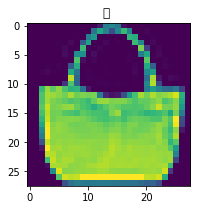

In [33]:
#样本可视化
img1 = X_train[100]
fig2 = plt.figure(figsize=(3,3))
plt.imshow(img1)
plt.title(label_dic[y_train_predict[100]])

In [34]:
label_dic[y_train_predict[100]]

'包 '

[1, 2, 3, 4, 5, 6, 7, 8, 9]


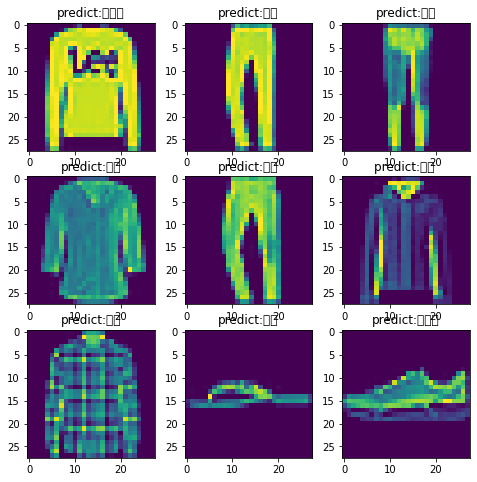

In [35]:
a = [i for i in range(1,10)]
print(a)
fig4 = plt.figure(figsize=(8,8))
font2 = {'family': 'SimHei'}


for i in a:
    plt.subplot(3,3,i)
    plt.imshow(X_test[i])
    plt.title('predict:{}'.format(label_dic[y_test_predict[i]]),font2)

![materials](materials2.png)